In [2]:
import pandas as pd

## GOOGLE DATA: Manually fill

In [3]:
profiles = {
    'truth' : {
        'age_range' : [23, 24],
        'education' : 'masters',
        'industry' : 'technology',
        'employer' : 'student'
    },
    'google' : {
        'age_range' : [18, 24],
        'relationship' : 'single',
        'income' : 'moderately high',
        'education' : 'bachelors',
        'industry' : 'technology',
        'employer' : 'large'
    }
}

## LINKEDIN Data: Write from file

In [4]:
linkedin = pd.read_csv("LinkedIn_Ad_Targeting.csv")

In [5]:
linkedin.columns

Index(['Member Age', 'Buyer Groups', 'Company Names', 'Company Names.1',
       'Company Follower of', 'Company Names.2', 'Company Category',
       'Company Size', 'Degrees', 'degreeClass', 'Member Schools',
       'Company Growth Rate', 'Fields of Study', 'Company Connections',
       'Function By Size', 'Job Functions', 'Member Gender', 'Graduation Year',
       'Member Groups', 'Company Industries', 'Member Interests',
       'Interface Locales', 'interfaceLocale', 'Member Traits',
       'Profile Locations', 'Company Revenue', 'Job Seniorities',
       'Member Skills', 'Job Titles', 'Job Titles.1', 'Job Titles.2',
       'Years of Experience'],
      dtype='object')

In [25]:
profiles['LinkedIn'] = {}
profiles['LinkedIn']['age_range'] = [int(i) for i in linkedin["Member Age"][0].split(" to ")]
profiles['LinkedIn']['education'] = linkedin["Degrees"][0]
profiles['LinkedIn']['industry'] = linkedin["Job Functions"][0]
profiles['LinkedIn']['interests'] = linkedin["Buyer Groups"][0]
profiles['LinkedIn']

{'age_range': [35, 54],
 'education': "High School Diploma; Master of Arts; Bachelor's Degree; Master's Degree; Bachelor of Science",
 'industry': 'Business Development',
 'interests': 'Data Science Software; Machine Learning Software & Platforms; Data Warehouse Software'}

## FITBIT DATA : Generate the map

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [18]:
# Load and concatenate multiple CSV files
import glob

files = glob.glob("TIMESERIES_GoogleData/gps_location*.csv")
df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list)

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')


In [19]:
df

,timestamp,latitude,longitude,altitude
0,2019-09-11 02:33:47+00:00,37.863787,-122.250017,96.3
1,2019-09-11 02:33:53+00:00,37.863793,-122.250043,96.1
2,2019-09-11 02:33:59+00:00,37.863813,-122.250048,96.0
3,2019-09-11 02:34:25+00:00,37.863815,-122.250010,96.1
0,2019-09-19 04:54:17+00:00,37.876362,-122.256265,129.0
...,...,...,...,...
88,2024-09-24 15:53:19+00:00,41.889996,-87.630972,222.3
89,2024-09-24 15:53:20+00:00,41.889997,-87.630973,222.3
90,2024-09-24 15:53:21+00:00,41.889997,-87.630973,222.3
91,2024-09-24 15:53:22+00:00,41.890000,-87.630975,222.3


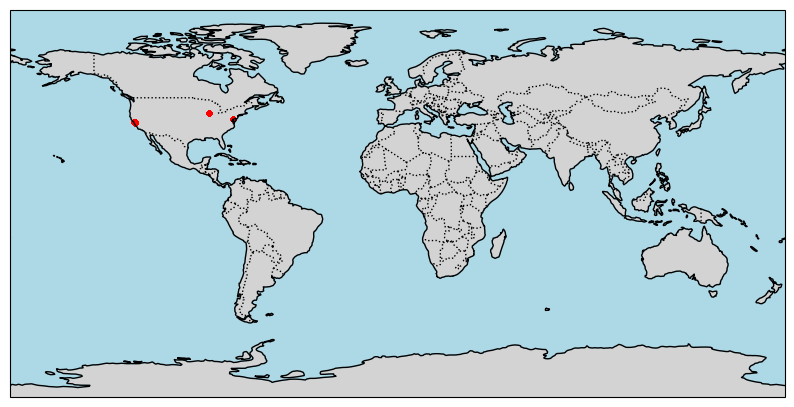

<Figure size 640x480 with 0 Axes>

In [37]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Plot initial points (optional)
ax.scatter(df['longitude'], df['latitude'], color='red', s=10, transform=ccrs.PlateCarree())
plt.show()
plt.savefig("fitbit_points.png")



## CREATE the artwork

In [26]:
from PIL import Image
from IPython.display import display
import ipywidgets as widgets

# Load the images
google_image = Image.open('google_image.png')  # Google
linkedin_image = Image.open('linkedin_image.png')  # LinkedIn
fitbit_image = Image.open('fitbit_image.png')  # Fitbit

profiles['google']['image'] = google_image
profiles['linkedin']['image'] = linkedin_image
profiles['fitbit']['image'] = fitbit_image

In [27]:
# Create a dropdown or button set to select the company
company_selector = widgets.Dropdown(
    options=['Google', 'LinkedIn', 'Fitbit'],
    value='Google',
    description='Company:',
)

# Create an output widget to display images
image_display = widgets.Output()

# Function to update image based on selection
def update_image(change):
    with image_display:
        image_display.clear_output()
        if company_selector.value == 'Google':
            display(google_image)
        elif company_selector.value == 'LinkedIn':
            display(linkedin_image)
        elif company_selector.value == 'Fitbit':
            display(fitbit_image)

# Observe the company selector and update image
company_selector.observe(update_image, names='value')

# Initial display
update_image(None)


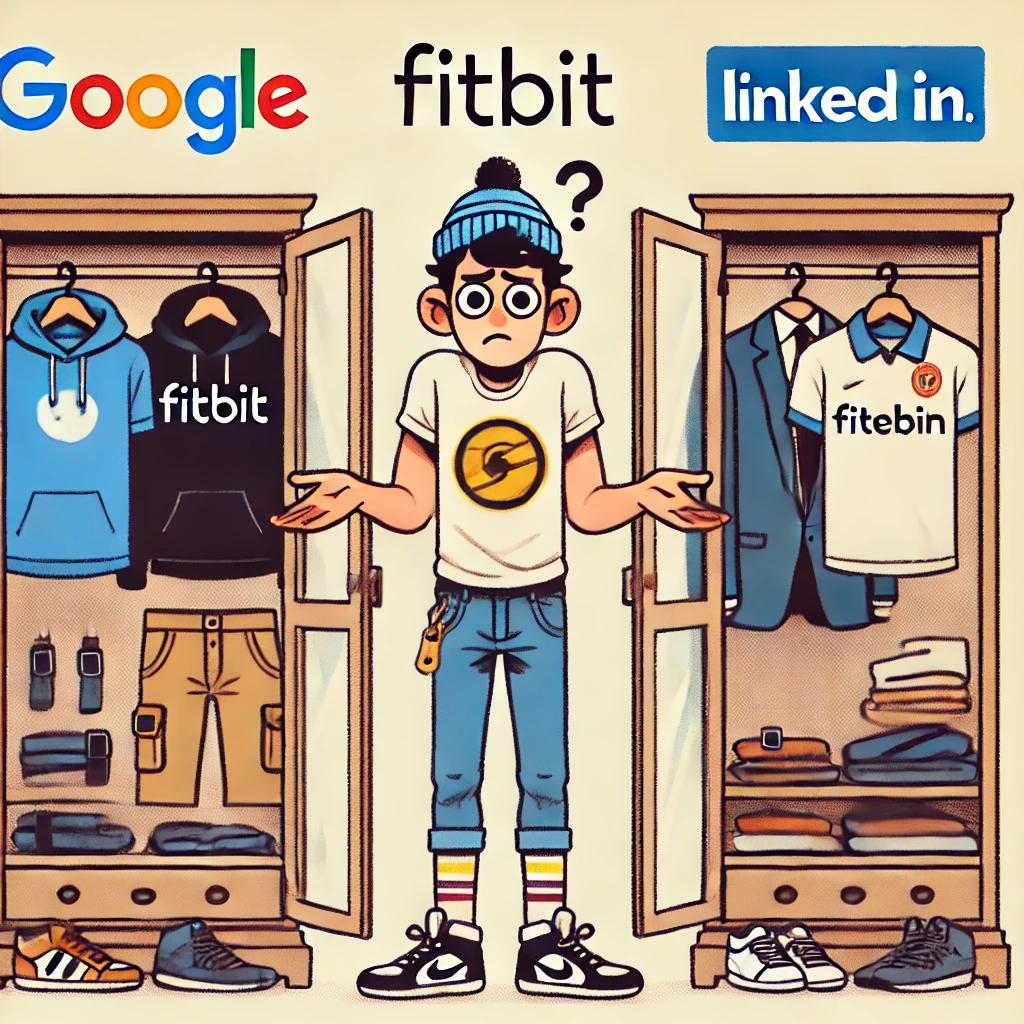

In [29]:
# Display the dropdown and image together
# Load the confused person image (replace 'confused_person.png' with your image path)
confused_person_image = Image.open('initial_confusion.png')

# Display the confused person image
display(confused_person_image)

# Display the interactive wardrobe
display(widgets.VBox([company_selector, image_display]))

